# Proyek Analisis Data: E-commerce Public  Dataset
- **Nama:** Mila Cahyani
- **Email:** milachyn05@gmail.com
- **ID Dicoding:** milachyn

## Menentukan Pertanyaan Bisnis

- Kategori produk apakah yang paling banyak dicancle oleh customer?
- Kategori produk apakah yang terbaik dan terburuk berdasarkan review?
- Metode pembayaran apa yang paling sering digunakan oleh customer?

## Import Semua Packages/Library yang Digunakan

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [560]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [561]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [562]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [563]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [564]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [565]:
orders_dataset_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [566]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [567]:
products_dataset_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [568]:
sellers_dataset_df = pd.read_csv("https://raw.githubusercontent.com/milacahyanii/Dicoding/main/Data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Menampilkan 5 data teratas dari setiap dataset
- langkah awal dalam pemrosesan data untuk memastikan data sudah ter-load dengan benar sebelum dianalisis lebih lanjut.

### Assessing Data

Menilai tabel `customers_df`




In [569]:
print("\n**Info tentang DataFrame customers_df**\n")
customers_df.info()


**Info tentang DataFrame customers_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [570]:
print("\n**Jumlah nilai yang hilang (NaN) di setiap kolom customers_df**\n")
customers_df.isna().sum()


**Jumlah nilai yang hilang (NaN) di setiap kolom customers_df**



,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [571]:
print("\n**Jumlah nilai unik di setiap kolom customers_df**\n")
customers_df.nunique()


**Jumlah nilai unik di setiap kolom customers_df**



,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [572]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()


Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Customer dataframe memiliki sebanyak 99441 entries
- Customer dataframe bersih tanpa nilai kosong
- Customer dataframe tidak memiliki data duplikasi

Menilai tabel `geolocation_df`

In [573]:
print("\n**Info tentang DataFrame geolocation_df**\n")
geolocation_df.info()


**Info tentang DataFrame geolocation_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [574]:
print("\n**Jumlah nilai unik di setiap kolom geolocation_df**\n")
geolocation_df.nunique()


**Jumlah nilai unik di setiap kolom geolocation_df**



,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


In [575]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- geolocation dataframe memiliki sebanyak 1000163 entries
- geolocation dataframe memiliki data duplikasi sebanyak 261831

Menilai tabel `order_items_df`

In [576]:
print("\n**Info tentang DataFrame order_items_df**\n")
order_items_df.info()


**Info tentang DataFrame order_items_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [577]:
print("\n**Jumlah nilai unik di setiap kolom order_items_df**\n")
order_items_df.nunique()


**Jumlah nilai unik di setiap kolom order_items_df**



,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [578]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- order_item dataframe memiliki sebanyak 112650 entries
- order_item dataframe tidak memiliki data duplikasi

Menilai tabel `order_payment_df`

In [579]:
print("\n**Info tentang DataFrame order_payments_df**\n")
order_payments_df.info()


**Info tentang DataFrame order_payments_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [580]:
print("\n**Jumlah nilai unik di setiap kolom order_payments_df**\n")
order_payments_df.nunique()


**Jumlah nilai unik di setiap kolom order_payments_df**



,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [581]:
print("\n**Jenis pemabayaran pada order_payments_df**\n")
order_payments_df.payment_type.unique()


**Jenis pemabayaran pada order_payments_df**



array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [582]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- order_payments dataframe memiliki sebanyak 103886 entries
- order_payments dataframe memiliki 5 jenis tipe pembayaran yang terdiri dari credit_card, boleto, voucher, debit_card, not_defined
- order_payments dataframe tidak memiliki data duplikasi

Menilai tabel `order_reviews_df`

In [583]:
print("\n**Info tentang DataFrame order_reviews_df**\n")
order_reviews_df.info()


**Info tentang DataFrame order_reviews_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [584]:
print("\n**Jumlah nilai unik di setiap kolom order_reviews_df**\n")
order_reviews_df.nunique()


**Jumlah nilai unik di setiap kolom order_reviews_df**



,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


In [585]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- order_reviews dataframe memiliki sebanyak 99224 entries
- order_reviews dataframe tidak memiliki data duplikasi

Menilai tabel `order_set_df`

In [586]:
print("\n**Info tentang DataFrame orders_dataset_df**\n")
orders_dataset_df.info()



**Info tentang DataFrame orders_dataset_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [587]:
print("\n**Jumlah nilai unik di setiap kolom orders_dataset_df**\n")
orders_dataset_df.nunique()


**Jumlah nilai unik di setiap kolom orders_dataset_df**



,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [588]:
print("\n**Jenis status pada kolom orders_dataset_df**\n")
orders_dataset_df.order_status.unique()


**Jenis status pada kolom orders_dataset_df**



array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [589]:
print("Jumlah duplikasi: ",orders_dataset_df.duplicated().sum())
orders_dataset_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- orders_dataset dataframe memiliki sebanyak 99441 entries
- orders_dataset dataframe memiliki 8 jenis status order yang terdiri dari delivered, invoiced, shipped, processing, unavailable, canceled, created, approved
- orders_dataset dataframe tidak memiliki data duplikasi

Menilai tabel `product_category_df`

In [590]:
print("\n**Info tentang DataFrame product_category_df**\n")
product_category_df.info()



**Info tentang DataFrame product_category_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [591]:
print("\n**Jumlah nilai unik di setiap kolom product_category_df**\n")
product_category_df.nunique()


**Jumlah nilai unik di setiap kolom product_category_df**



,0
product_category_name,71
product_category_name_english,71


In [592]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- product_category dataframe memiliki sebanyak 71 entries
- product_category dataframe tidak memiliki data duplikasi

Menilai tabel `product_dataset_df`

In [593]:
print("\n**Info tentang DataFrame products_dataset_df**\n")
products_dataset_df.info()



**Info tentang DataFrame products_dataset_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [594]:
print("\n**Jumlah nilai unik di setiap kolom products_dataset_df**\n")
products_dataset_df.nunique()


**Jumlah nilai unik di setiap kolom products_dataset_df**



,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


In [595]:
print("Jumlah duplikasi: ",products_dataset_df.duplicated().sum())
products_dataset_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- products_dataset dataframe memiliki sebanyak 32951 entries
- products_dataset dataframe tidak memiliki data duplikasi

Menilai `seller_dataset_df`

In [596]:
print("\n**Info tentang DataFrame sellers_dataset_df**\n")
sellers_dataset_df.info()


**Info tentang DataFrame sellers_dataset_df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [597]:
print("\n**Jumlah nilai unik di setiap kolom sellers_dataset_df**\n")
sellers_dataset_df.nunique()


**Jumlah nilai unik di setiap kolom sellers_dataset_df**



,0
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23


In [598]:
print("Jumlah duplikasi: ",sellers_dataset_df.duplicated().sum())
sellers_dataset_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- seller_dataset dataframe memiliki sebanyak 	3095 entries
- seller_dataset dataframe tidak memiliki data duplikasi

### Cleaning Data

Cleaning data `geolocation_dataset`

In [599]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [600]:
geolocation_df.drop_duplicates(inplace=True)

In [601]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menghapus sebanyak 261831 data duplikasi pada dataset geolocation

Cleaning data `order_items`

In [602]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [603]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [604]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengubah tipe data `shipping_limit_date` yang sebelumnya object menjadi datetime

Cleaning data `order_reviews`

In [605]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [606]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [607]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- Mengubah tipe data `review_creation_date`, dan `review_answer_timestamp`  yang sebelumnya object menjadi datetime

Cleaning data `orders_dataset`

In [608]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [609]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                    "order_delivered_customer_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

In [610]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Mengubah tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date, order_delivered_customer_date`, dan `order_estimated_delivery_date`  yang sebelumnya object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data `customers_dataset`

In [611]:
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [612]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [613]:
customers_df.customer_id.is_unique

True

In [614]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [615]:
data_city_customer = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
print("\n**5 Kota dengan Jumlah Pelanggan Unik Terbanyak**\n")
data_city_customer.head(5)


**5 Kota dengan Jumlah Pelanggan Unik Terbanyak**



,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


In [616]:
data_state_customer = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
print("\n**5 Negara Bagian dengan Jumlah Pelanggan Unik Terbanyak**\n")
data_state_customer.head(5)


**5 Negara Bagian dengan Jumlah Pelanggan Unik Terbanyak**



,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


### Explore data `geolocation_dataset`

In [617]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
54322,3375,-23.575826,-46.547705,sao paulo,SP
560008,31070,-19.891779,-43.892964,belo horizonte,MG
361852,16201,-21.247559,-50.319000,birigui,SP
836428,79110,-20.451723,-54.642356,campo grande,MS
621577,36847,-20.831825,-42.157438,pedra dourada,MG


In [618]:
geolocation_df.groupby(by="geolocation_zip_code_prefix").size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


### Explore data `order_items_dataset`

In [619]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
96391,dac20199c3b53e630f19bf3dc1744bba,1,03d5bcd7db52bee20887c5034650185d,a416b6a846a11724393025641d4edd5e,2017-12-07 08:53:22,59.99,21.22
52018,765bb3ceb5fc35d9d71f6807ce32426d,1,668c66401c7341a09fbde2bcf15c1d55,6481e96574816ead57975da2c0f6d80d,2018-02-21 23:31:22,60.00,32.78
112393,ff5912414bd207006a7af78477de9733,1,77922dd87928c2cf9225946dac2a27a7,5343d0649eca2a983820bfe93fc4d17e,2018-02-26 14:30:45,56.00,16.15
486,011fcb4fabb3e142579ad63472b11227,1,b60856ce32d90658dbf99b9485327c25,8b321bb669392f5163d04c59e235e066,2018-02-15 13:50:23,9.00,14.10
3327,0778ca929f32b5357008bd57489a1272,1,4793826002e5bd292a4f0057c11f670b,4c8b8048e33af2bf94f2eb547746a916,2017-08-28 17:06:48,44.10,16.11


In [620]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


### Explore data `order_payments_dataset`

In [621]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
26489,de8e149a85e92c7cf24c1f7318f5f1a1,1,credit_card,6,187.65
65060,fb6f9beaf3a466694906162da16202d9,1,credit_card,10,214.56
84991,b410cd41ac56f6a246e23dc5158f12d9,1,credit_card,2,90.22
84357,5d77e1d80ea67e8a68570ae87730fc2d,1,credit_card,1,69.73
36165,21ca56b276a6b8d082a1261f33786085,1,credit_card,4,44.80


In [622]:
jenis_payment = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
jenis_payment.head(5)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [623]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Explore data `order_reviews_dataset`

In [624]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
14953,976e77d0c36f07a31c73e5590ade2859,98dd966a1e38eb56010bc5d422f3d3ce,5,NaN,NaN,2018-08-22,2018-08-23 10:40:33
81673,d559ad4790970ed9b2e9f45e63e36cc9,bc15fbc81213ff69f9fb7ba05d73dc33,5,NaN,"Entrega adiantada, me mantiveram informado da ...",2017-07-08,2017-07-09 09:01:04
20384,a0bd0b00bb586c6af68067d7b257cfe1,da7843573e4914d76380f7f0a86995a3,4,NaN,"Tapete bem bonito, com acabamento bem feito. N...",2017-09-01,2017-09-04 10:57:26
36084,9dc50077272395ec4c7dcf0ff89be4fa,c5a468ae781ffb0ec6d36ae89fe512b0,5,NaN,Super Recomendo..Um encanto :-),2017-01-21,2017-01-23 09:57:30
60250,15ca614ee8930a84d748d4f6a19be571,d7123732c68ff880f12d65c308f133a9,3,NaN,NaN,2017-11-11,2017-11-11 10:40:48


In [625]:
order_reviews_df["review_score"].sort_values(ascending=False)

,review_score
81664,5
41507,5
41493,5
76470,5
41496,5
...,...
88349,1
73809,1
88351,1
46329,1


In [626]:
order_reviews_df["review_score"].value_counts(ascending=False)

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


### Explore data `order_dataset`

In [627]:
orders_dataset_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
25346,1a018d08ae8c02d0106efe732d3e8a03,1516137a38d62194d55d7f4afc8498be,delivered,2018-08-07 19:37:16,2018-08-07 19:50:18,2018-08-08 14:08:00,2018-08-15 18:24:36,2018-08-30
82497,6545aea5d681938dc5f177dfe17b62c9,b63c3897b6259fc5ea20bb997624ba7c,delivered,2018-02-11 22:55:27,2018-02-11 23:07:59,2018-02-14 21:59:07,2018-02-15 20:56:09,2018-02-26
27090,17f027e58cb5cfb188bac60e3abc5cfe,498ce7988d1d397953797898c734dc82,delivered,2018-02-23 17:59:57,2018-02-23 18:15:24,2018-02-27 18:43:16,2018-03-12 15:24:54,2018-03-15
22969,5a0338c421599254813c9ab9d9c3dc2f,5d0a0ccfb50f5dd07398cfae09297925,delivered,2017-04-24 22:02:11,2017-04-24 22:15:20,2017-04-27 11:24:46,2017-05-03 15:46:23,2017-05-17
2493,1a9f85c859f73034acc85057b4899a8e,f34e32b8604090d1c2a7f3b04c834807,delivered,2017-07-06 17:11:14,2017-07-06 17:25:21,2017-07-07 18:12:02,2017-07-31 22:42:33,2017-08-10


In [628]:
orders_dataset_df["order_status"].value_counts(ascending=False)

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### Explore `orders_dataset_df` & `customers_dataset_df`

In [629]:
orders_customers_df = pd.merge(
    left=orders_dataset_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [630]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


### Explore `order_payments_df` & `order_review_df`

In [631]:
payments_review_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


In [632]:
payments_review_df.sort_values(by="payment_type", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
89436,4c08f008753759d67d8ef45942f1a891,4,voucher,1,39.42,4c87b9291aa0926fb7a369a928ae1f58,5.0,NaN,Recebi todos os produtos bem certinho e no pra...,2018-06-19,2018-08-02 12:18:38
61926,0c65eb5a1415db7a20dfc869c9277e7a,2,voucher,1,8.59,ee40ec76a6566abad15cb95596544d9e,1.0,NaN,Além de não entregarem.não fui avisada nem ree...,2017-09-23,2017-09-27 16:23:43
13840,527f95bc978265984802f8ef4ed9dd51,4,voucher,1,4.84,3ba88b6dc52875aad372d714a713117a,5.0,NaN,NaN,2017-07-11,2017-07-11 15:12:25
88566,4a778bf83b14e5f0f74e35bf9dea4a7c,2,voucher,1,17.77,d2dd62086edcecabec4ddb7b2dff85f1,5.0,NaN,Produto certinho conforme anunciado \nChegou a...,2018-02-23,2018-02-25 21:21:18
88565,fdd4a975a3f9bbe439a0faf0fa587f83,2,voucher,1,28.04,8dd82826ed5c4fc3c8a26206928aad15,5.0,NaN,NaN,2017-11-10,2017-11-10 21:01:44
...,...,...,...,...,...,...,...,...,...,...,...
24545,b713808dd06ed1a61d95a024a3e367a1,1,boleto,1,146.46,5203a5dfd82a6ca3e9b03c4fc6be6640,5.0,NaN,Loja bem sincera nas vendas. Na minha opinião ...,2018-03-11,2018-03-11 22:45:04
76084,387dbd8ab95a2cea602adfc5434f7258,1,boleto,1,389.01,de726e8f6515c4b974fae145e795d0dd,1.0,NaN,a até agora não recebi,2018-04-06,2018-04-06 13:54:06
76083,3611e9793009655c4d1350655211953c,1,boleto,1,80.59,b4bc943faf60e1a36f13f4b6f4d00eef,2.0,NaN,Prazo para o dia 12/07 e não foi entregue,2017-07-14,2017-07-14 17:54:35
76080,5f79591dc99f5f8850f6259c80b83be2,1,boleto,1,43.56,2bc124d42c6fbdb75fddabf2f1b3ce89,5.0,NaN,NaN,2018-07-04,2018-07-05 00:34:59


In [633]:
payment_counts = payments_review_df.groupby('payment_type')['payment_type'].count().sort_values(ascending=False)

### Explore `order_dataset_df` & `product_dataset_df`

In [634]:
product_order_df = pd.merge(
    left=orders_dataset_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
product_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [635]:
canceled_orders_df = product_order_df[product_order_df["order_status"] == "canceled"]

In [636]:
canceled_product_counts = canceled_orders_df.groupby("product_id").size().sort_values(ascending=False)
print("\n**Jenis produk yang paling banyak dibatalkan**\n")
print(canceled_product_counts.head(10))


**Jenis produk yang paling banyak dibatalkan**

product_id
8397dc503d1a0c2ac7422701884de5a6    6
5c3eaf54e8ee5d5378765ff16df7640b    6
3ea32f63a6aaf8d467e543dedf434ee7    5
c3a52053718435a35e070b991ff546ec    5
ed08ea04c92f5f434c2362f7310fb328    5
66b1f09e746c05761bcaccf6339bde8d    5
75f3ef6a5cb0f2d5aeef15925f0ccf69    5
1c42962612d557f85753b24c2b97070f    5
99b4367cf2228c8a86922a0649bee6b8    5
7d4f932dd4fa16256c20de073329eacc    5
dtype: int64


In [637]:
product_canceled_df = pd.merge(
    left=canceled_orders_df,
    right=products_dataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_canceled_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,1.0,ad673c1cd02b966e931f9db4fdc34791,...,25.0,8.34,informatica_acessorios,39.0,1321.0,3.0,350.0,22.0,11.0,17.0
1,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,1.0,a0b7d5a992ccda646f2d34e418fff5a0,...,69.9,26.11,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
2,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1.0,7e857e35018e4a05b7d124d1628dc1f0,...,35.9,15.10,esporte_lazer,14.0,1346.0,1.0,329.0,20.0,16.0,18.0
3,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore `order_payments_df` & `customers_df`

In [638]:
customers_df = pd.merge(
    left=orders_customers_df,
    right=payments_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58


### Explore `orders_items_df` & `sellers_df`

In [639]:
items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_dataset_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
    )
items_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [640]:
items_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(5)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52


### Explore `product_category_df` & `product_dataset_df`

In [641]:
product_df = pd.merge(
    left=products_dataset_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
    )
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [642]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(5)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335


### Explore `items_seller_df` & `product_dataset_df`

In [643]:
product_seller_df = pd.merge(
    left=product_df,
    right=items_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
    )
product_seller_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [644]:
product_seller_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [645]:
product_seller_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore all data

In [646]:
all_df = pd.merge(
    left= customers_df,
    right=product_seller_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head(15)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,pet_shop,1.0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,stationery,1.0,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,...,65.0,auto,1.0,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,7112.0,guarulhos,SP
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,...,15.0,NaN,1.0,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,5455.0,sao paulo,SP
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,...,17.0,auto,1.0,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,12940.0,atibaia,SP


In [647]:
all_df.groupby(by=["customer_city"]).agg({
    "order_id": "sum",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_city,,
sao paulo,e481f51cbdc54678b7cc49136f2d6af7e481f51cbdc546...,2901789.67
rio de janeiro,e6ce16cb79ec1d90b1da9085a6118aebe6ce16cb79ec1d...,1581736.07
belo horizonte,3bc77ce8be27211bac313c2daa402d1ab2f3763408103b...,509165.81
brasilia,948097deef559c742e7ce321e5e58919f346ad4ee8f630...,435971.02
curitiba,5447160f15621601fa9ba2b94f4906b38eeda294fab8a5...,333582.09
...,...,...
santo antonio do rio abaixo,f2bda88ec797456b974f810a84814028,24.23
tamboara,85b3107b92fa3be19162c3ceed1bb0b5,24.09
jenipapo de minas,cec79ef92819a9f1f2009e1d8cf26db8,22.58


In [648]:
all_df.groupby(by=["product_category_name_english"]).agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

## Visualization & Explanatory Analysis

### Kategori produk apakah yang paling banyak dicancle oleh customer?

In [649]:
canceled_orders_df = all_df[all_df['order_status'] == 'canceled']

top_10_canceled_products_df = canceled_orders_df.groupby(by="product_category_name").order_id.nunique().reset_index()

top_10_canceled_products_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

top_10_canceled_products_df = top_10_canceled_products_df.sort_values(by="order_count", ascending=False).head(10)

top_10_canceled_products_df



,product_category_name,order_count
24,esporte_lazer,47
47,utilidades_domesticas,37
8,beleza_saude,36
30,informatica_acessorios,35
9,brinquedos,31
36,moveis_decoracao,24
5,automotivo,24
44,relogios_presentes,20
10,cama_mesa_banho,18
45,telefonia,16


<ipython-input-650-7f4c6eb86107>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

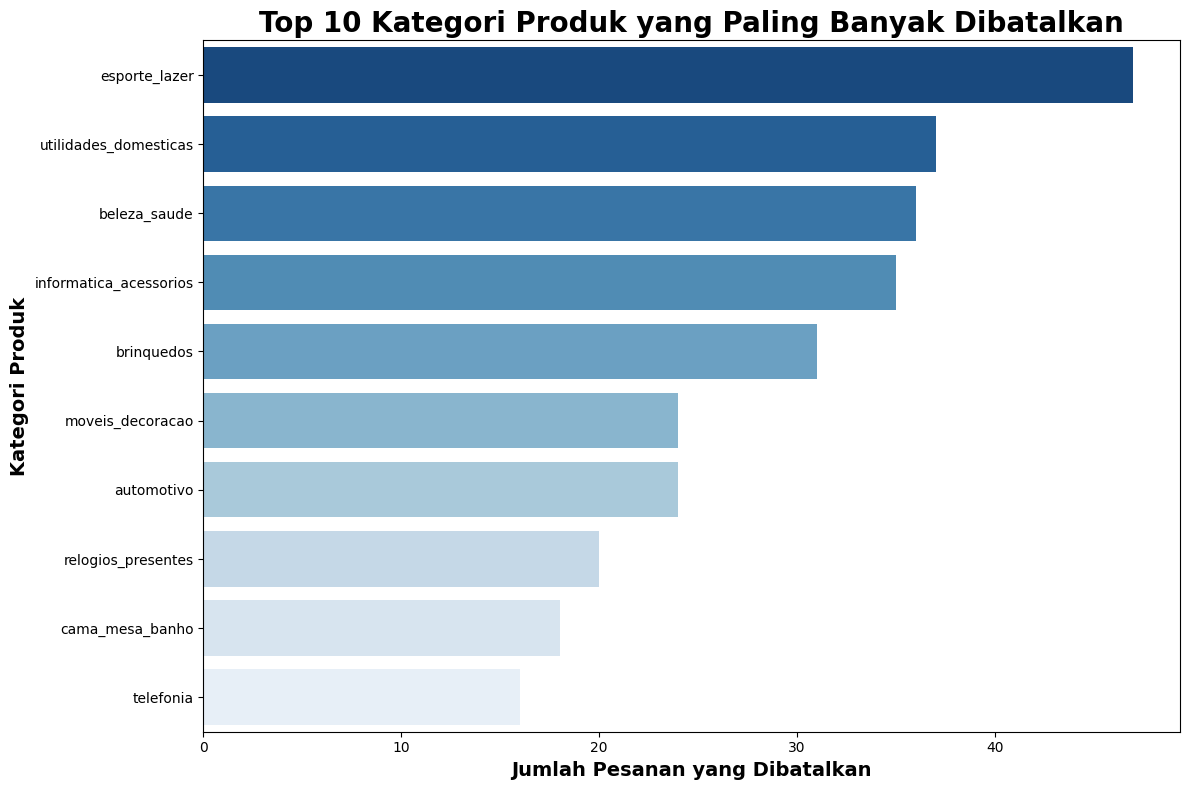

In [650]:
plt.figure(figsize=(12, 8))

sns.barplot(
    x=top_10_canceled_products_df['order_count'],
    y=top_10_canceled_products_df['product_category_name'],
    palette='Blues_r'
)


plt.title('Top 10 Kategori Produk yang Paling Banyak Dibatalkan', loc='center', fontsize=20, weight='bold')
plt.ylabel('Kategori Produk', fontsize=14, weight='bold')
plt.xlabel('Jumlah Pesanan yang Dibatalkan', fontsize=14, weight='bold')


plt.tight_layout()
plt.show()



### Kategori produk apakah yang terbaik dan terburuk berdasarkan review?

<ipython-input-651-1518390314fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='category_eng', data=top_category_product_review, palette='Blues', ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:9

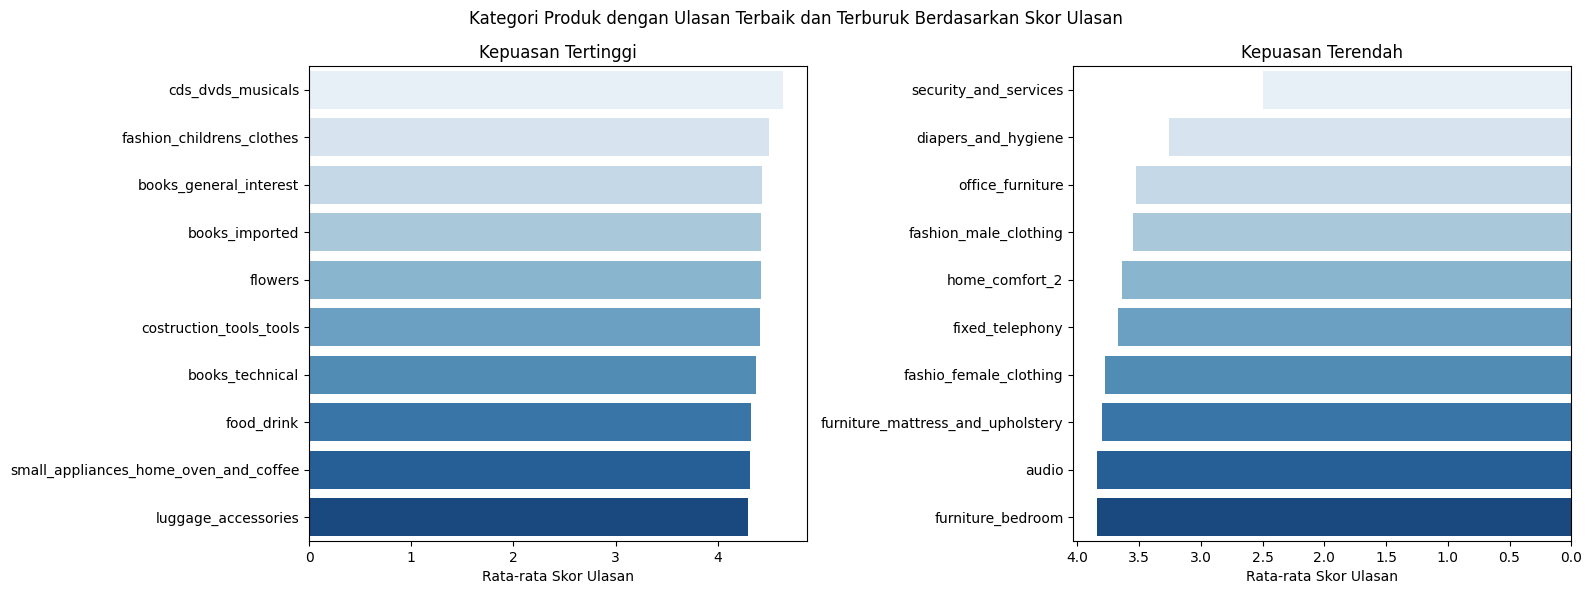

In [651]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
all_df.rename(columns={
    "product_category_name_english": "category_eng"
}, inplace=True)

top_category_product_review = all_df.groupby(by=['category_eng']).review_score.mean().reset_index().sort_values(by='review_score', ascending=False).head(10)
sns.barplot(x='review_score', y='category_eng', data=top_category_product_review, palette='Blues', ax=ax[0])
ax[0].set_xlabel('Rata-rata Skor Ulasan')
ax[0].set_ylabel(None)
ax[0].set_title('Kepuasan Tertinggi')

low_category_product_review = all_df.groupby(by=['category_eng']).review_score.mean().reset_index().sort_values(by='review_score', ascending=True).head(10)
sns.barplot(x='review_score', y='category_eng', data=low_category_product_review, palette='Blues', ax=ax[1])
ax[1].set_xlabel('Rata-rata Skor Ulasan')
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].set_title('Kepuasan Terendah')

plt.suptitle('Kategori Produk dengan Ulasan Terbaik dan Terburuk Berdasarkan Skor Ulasan')
plt.tight_layout(pad=1)
plt.show()



### Metode pembayaran apa yang paling sering digunakan oleh customer?

<ipython-input-652-5990dd21b853>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

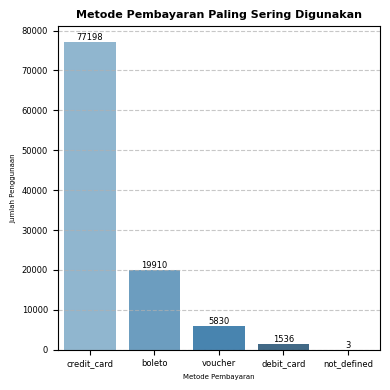

In [652]:
plt.figure(figsize=(4, 4))

sns.barplot(
    x=payment_counts.index,
    y=payment_counts.values,
    palette='Blues_d'
)

plt.title('Metode Pembayaran Paling Sering Digunakan', fontsize=8, weight='bold')
plt.xlabel('Metode Pembayaran', fontsize=5)
plt.ylabel('Jumlah Penggunaan', fontsize=5)


for index, value in enumerate(payment_counts.values):
    plt.text(index, value + 500, f'{value}', ha='center', fontsize=6)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()


### RFM Analysis

In [685]:
all_df['customer_id'] = all_df['customer_unique_id'].str[:5]

rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00003,2018-05-10 10:56:27,1,141.90
1,0000b,2018-05-07 11:11:27,1,27.19
2,0000f,2017-10-12 20:29:41,2,129.84
3,0004a,2017-11-14 19:45:42,1,196.89
4,0004b,2018-04-05 19:33:16,1,166.98


In [686]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].max().date()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00003,2018-05-10,1,141.90,160
1,0000b,2018-05-07,1,27.19,163
2,0000f,2017-10-12,2,129.84,370
3,0004a,2017-11-14,1,196.89,337
4,0004b,2018-04-05,1,166.98,195


In [687]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00003,1,141.90,160
1,0000b,1,27.19,163
2,0000f,2,129.84,370
3,0004a,1,196.89,337
4,0004b,1,166.98,195


In [688]:
rfm_df.describe()

,frequency,monetary,recency
count,91719.000000,91719.000000,91719.000000
mean,1.084192,224.377327,284.152825
std,0.316229,661.748239,152.900413
min,1.000000,0.000000,0.000000
25%,1.000000,65.480000,161.000000
50%,1.000000,117.590000,264.000000
75%,1.000000,215.140000,392.000000
max,17.000000,109312.640000,772.000000


In [690]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
48649,87ab9,1,89.71,0
13720,262e1,2,444.06,1
62929,af545,3,592.65,14
35672,63442,2,160.76,16
55850,9bb92,1,137.03,18


In [691]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
50554,8d50f,17,927.63,58
22414,3e43e,9,1963.58,232
9867,1b6c7,7,1386.54,245
72592,ca770,7,2126.44,138
36066,6469f,7,973.09,111


<ipython-input-692-1191d6e83c73>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id",
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you wil

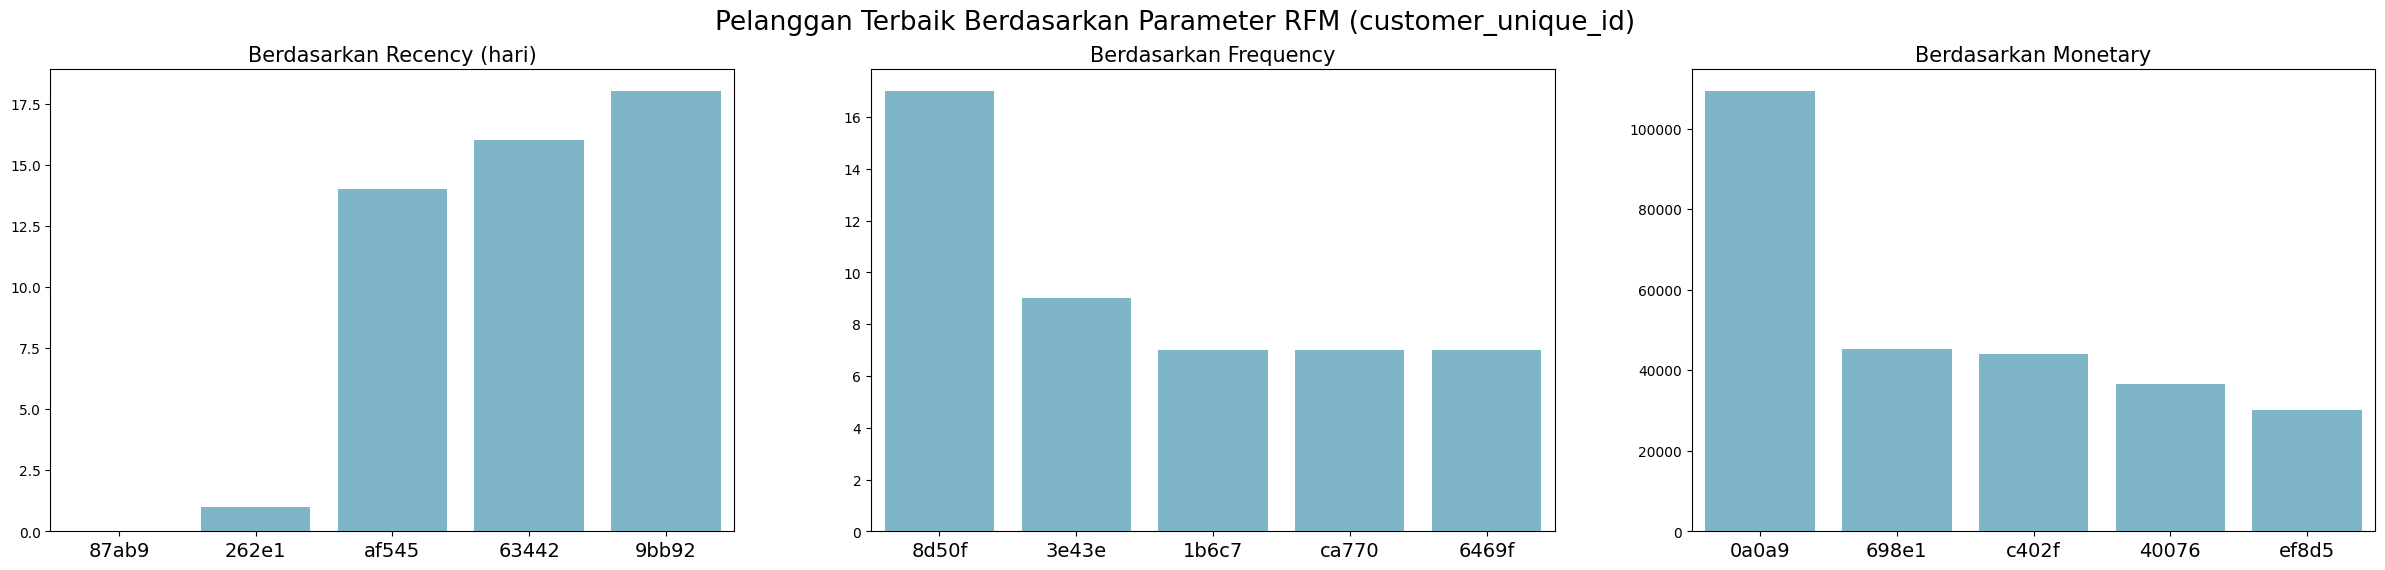

In [692]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))


colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=14)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=14)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=14)


plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM (customer_unique_id)", fontsize=19)
plt.show()

**Insight:**
-  Grafik recency menunjukkan bahwa customer 2823f melakukan pembelian paling baru karna nilai recency terkecil, artinya mereka baru saja melakukan pembelian.
- customers 8d50f merupakan customers yang melakukan pembelian paling sering.
-  0a0a9 adalah customer dengan pengeluaran tertinggi, artinya memberikan kontribusi pendapatan yang jauh lebih besar dibandingkan yang lainnya


## Conclusion

1. Kategori produk apakah yang paling banyak dicancle oleh customer?

- Kategori produk yang dengan pembatalan terbanyak yaitu, esporte_lazer dengan 47 canceled product

2. Kategori produk apakah yang terbaik dan terburuk berdasarkan review?

- Kategori produk yang berada diperingkat teratas untuk tingkat kepuasaan tertinggi yaitu cds_dvds_musicals
- Kategori produk yang berada diperingkat teratas untuk tingkat kepuasaan terendah yaitu furniture_bedroom

3. Metode pembayaran apa yang paling sering digunakan oleh customer?

- Credit card merupakan metode pembayaran yang paling sering digunakan

In [693]:
all_df.to_csv('main_data.csv', index=False)